# Coursera Capstone - Small Business Location Advisor  <a class='tocSkip'>
# Final Report  <a class='tocSkip'>

Prepared by John Christofolakos  
April 2019  
john.christofolakos@gmail.com


## Introduction

### Background

Opening a new small business is an endeavour that is fraught with risk. Although many business sectors have moved to the online world, many smaller retail and service-oriented businesses require a bricks-and-mortar presence. For these businesses, location will be a key factor in their success.

Defining a small business as having 1-99 paid employees, the Government of Canada reports [2] that:
- 97.9 percent of Canadian business are small businesses, employing 69.7 percent of the total private labour force and accounting for 67.5 percent of net employment growth.
- between 2010 and 2015 an average of 95,000 new small businesses were created each year, and an average of 85,000 disappeared.
- the ten-year survival rate for new small businesses was less than 50%.

It is clear that any contribution to improving the success rate of new small businesses could have a significant impact not only on the business owners themselves, but on the Canadian economy as a whole.

Additionally, as will be seen below, we will attempt to identify neighbourhoods that are under-serviced by a specific type of business. More equitable distribution of local services could improve quality of life in those neighbourhoods by reducing wait times for scarce services, or the need to travel outside the neighbourhood for particular goods or services.

### Problem

The problem to be addressed is to provide location-related advice to entrepreneurs who are considering opening a small business in the Greater Toronto Area (GTA). Specifically, neighbourhoods will be identified where the demand for the type of business they are considering may be the highest.

The general approach is to obtain data regarding the mix of businesses already established in each GTA neighbourhood. The entrepreneur will provide the type of business under consideration. Then each GTA neighbourhood is compared against 'similar' neighbourhoods in the city to see if there is currently an undersupply or oversupply of that business type in the neighbourhood. The 'similarity' of neighbourhoods will be determined by an unsupervised machine learning algorithm that clusters neighbourhoods into a defined number of groups.

It is important that the comparison is done against similar neighbourhoods and not against city-wide averages in order to take into account the diversity of Toronto neighbourhoods which is reflected in the mix of businesses they provide.

The results are plotted on a street map of the city, allowing the entrepreneur to easily identify the neighbourhoods with the greatest undersupply and therefore those where demand for their new business is likely to be the greatest.

### Audience

The key target audience for the project is, as mentioned, small business entrepreneurs. It is not expected that this project will provide definitive guidance in locating a business, as there are many factors it does not consider. Rather it should be regarded as a preliminary step in the market research process, to help narrow down the large number of potential neighbourhoods into a smaller number of high-potential neighbourhoods which would then be considered more deeply. 

The analysis may also be of interest to members of the general public who are considering relocating to or within the GTA, as a preliminary means of narrowing down the neighbourhoods in which they might want to take up residence based on the mix of services available in each. However, this is not a primary focus of the study.

## Methodology

### Modelling Appproach

The general approach is to acquire information about the mix of business types present in a neighbourhood, both at a high level of generalisation, and at a very detailed level. Additionally, information on the price level and customer rating of each bunsiness was acquired and averaged over all businesses in each neighbourhood. The general business types, average price level and average rating are then used to 'cluster' the GTA neighbourhoods into a small number of types.

### Model Preparation

The mix of business types was normalised to percentages of the total businesses in each neighbourhood, this allows large or dense neighbourhoods to be clustered with small or sparse neighbourhoods, so long as the proportions of business types are similar. An unsupervised clustering algorithm, K-means with a cosine distance measure, was chosen. Since K-means is available only using the Euclidean distance measure, the feature vectors were normalised to be of length 1 before running the clustering algorithm. For such vectors, the Eudclidean distance and cosine distance are proportional.

The business data can be downloaded and clustered as an 'offline' preparatory step, and datasets created that contain the downloaded business informatioon and the neighbourhood type assigned to each neighbourhood.

### Model Use

Using the clustered business information, we can now interact with the client and determine the detailed type of business that they are proposing to establish. A linear model is then built for built for each neighbourhood type that is able to 'predict' the expected number of businesses of that type in the neighbourhood based on the mix of high-level business types in that neighborhood.

Neighbourhoods that actually have a significantly larger-than-predicted number of such businesses can be said to be 'oversupplied' and might be expected to be poor candidates for a new business of that type. Neighbourhoods with significantly smaller-than-predicted numbers of the target business type are 'undersupplied' and might be good candidates.

The neighbourhoods are then grouped into 5 bins depending on the degree of under- or over-supply of that business type in the neighbourhood. These bins are then plotted on a choropleth map that shows the most and least promising neighbourhoods for a new business of the specified type.

## Data Acquisition

At a high level, the data requirements of the project are:
- the geographical boundaries and identifying information for neighbourhoods in the GTA.
- data describing the businesses in each neighbourhood according to type, price range, and possibly other characteristics.

Other data could be considered for a larger-scale implementation of a business location advisor. For example:
- population density.
- population demographics by age or income.
- distribution of zoning bylaw categories.
- mix of housing types present in the neighbourhood.
- commuting patterns - is this a neighbourhood people commute to, commute from, or work locally.

In the interest of keeping the project small and simple, it was decided to confine our data to information regarding the businesses existing in the meighbourhood. It is reasonable to assume that such information can at least partially serve as a proxy for these other types of information.

### Neighbourhoods

The idea of a 'neighbourhood' can be defined in various ways. For the purposes of this project, postal codes were used. The first three characters of a Canadian postal code define a 'forward sortation area' (FSA), which is the final location from which mail is dispatched for delivery. Because Toronto has a large number of natural boundaries - rivers, ravines, parklands as well as the usual man-made barriers like major throroughfares, these generally provide a good correspondence to what Torontonians think of as 'neighbourhoods'. The FSA's in the GTA number approximately 100 which results in reasonably-sized neighbourhoods - not too large or too small.

Although the boundaries between forward sortation areas do often run along major thoroughfares, it can be noted by sampling google maps that for practical reasons, all of the addresses on a given major street are usually placed in the same FSA. This is good for our purposes as well, as it would be rather artificial to consider the businesses on one side of a major street to be in a different 'neighbourhood' from those on the other side.

Use of postal codes to define neighbourhoods provide the following additional benefits:
- the postal code for a business is readily available, and although occasionally it may be an off-site mailing address, it normally corresponds with the business's geographical location.
- the postal codes can be used directly to assign a business to a neighbourhood, so we do not need to rely on imprecise 'proximity to the neighbourhood center', or complicated geocode polygon testing to assign businesses to neighbourhoods based on their latitude and longitude.
- geographical data is available from Statistics Canada that precisely defines the boundaries of each FSA, allowing the neighbourhoods to be accurately depicted on a choropleth map.

Three data sources were used to define and identify the GTA neighbourhoods:
- Wikipedia - the pages titled 'List of postal codes of Canada' [4] contain lists of forward sortation areas and the name of the borough and neighbourhood(s) they correspond to. All FSA's for the GTA begin with the letter 'M'. The HTML was scraped to get identifying information for each FSA that is more human-friendly than the 3-character FSA codes.
- ArcGIS geodata - the site at https://www.arcgis.com/ provides a point location and bounding box for each FSA. This information is used to place markers into the neighbourhoods. The site is accessed via a public-domain python module, 'arcgis'. The FSA can be passed to the geocode module and the returned information includes the latitude/longitude of the center of the neighbourhood, as well as the corners of a bounding box for the neighbourhood.
- FSA geodata - available from Statistics Canada [2] was used to enable plotting of the boundaries of each FSA on a choropleth map. A 'shape' file was downloaded and then converted to a geojson file usable by a mapping library.

### Business Information

Although the course suggests obtaining business data from FourSquare, this was found to be unsatisfactory for a few reasons:
- the venue data includes a lot of locations that one would not really consider 'businesses', as well 'events' that are not really even 'venues'.
- postal code information is available for only about 75% of the venues.
- since the data is customer-sourced it is likely to be biased towards neighbourhoods and venues that are frequented by a specific 'highly connected' demographic.
- the 'explore' API is geared towards providing recommendations, it is not clear what biases may be reflected in the results.

For the use case involving small businesses, use of Yelp seems a better choice. It has virtually complete postal code information, and is specifically marketed to provide complete coverage of local businessses that would be patronised by all demographics. The free account API limits are much smaller than FourSquare's, but manageable. It also has 'price range' information which is critical. Like most other cities, Toroonto neighbourhoods tend to have residents that share a common income level, and this is an important factor in locating a business. For example, it would not be useful to recommend locating a high-end boutique in a lower income neighbourhood, or a thrift shop in a high income neighbourhood.

## Data Preparation

### Neighbourhood Geography

The Wikipedia neighbourhood data needed the following cleanup before becoming suitable for use:
- it listed postal codes that are not yet assigned, these were dropped.
- for some postal codes, only a borough name was given with no neighbourhood name. For these, the borough name was duplicated as the neighbourhood name.
- some postal codes are for processing centers or business reply mail depots, these were dropped.

The ArcGIS geodata, giving the latitude/longitude for the center and bounding box of each neighbourhood was retrieved and visualised and the following problems were noted:
- a few of the neighbourhood center co-ordinates were not very well placed, a couple were even outside the boudnaries of the neighbourhood. These were adjusted manually by referring to Google Maps.
- the bounding boxes were very generous, and had too much overlap to be useful in defining neighbourhood boundaries. This was the motivation for seeking the more detailed boundary geodata that was found at Statistics Canada. The overall maximum and minimum bounding box coordinates were retained for use in defining the boundary of the entire GTA,otherwise this data was discarded in favour of the StatsCan geodata.

The FSA geodata needed preprocessing in order to:
- convert the original 'shape' file to geojson format, wihich is consumable by the mapping library that is used.
- transform the spatial reference used for the feature boundary co-ordinates to EPSG:4326 (the standard used for GPS, the ArcGIS geodata, and by the mapping library).
- downsize the geodata to a manageable size - 100 meters resolution was found to give good results and quick display of maps.
- discard all non-GTA FSA's (those not beginning with the letter 'M').

The ogr2ogr utility, available from the Geospatial Data Abstraction Library site [1], can be used with the following command line to perform the first three preprocessing steps:
`ogr2ogr -f GeoJSON -simplify 100 -t_srs EPSG:4326 canada_postalcodes_100.geojson lfsa000b16a_e.shp`

The resulting file is JSON format, it can be loaded using the standard python JSON module and the features which do not correspond to GTA neighbourhoods can be filtered out by ordinary array manipulation.

The alignment between the Wikipedia neighbourhood data and the FSA geodata was checked, and it was discovered that no geodata was provided for 5 of the Wikipedia FSA's that survived the initial cleanup. One of these was an additional postal station, and was dropped. Three others were postal codes for specific downtown office buildings and the Toronto Underground. Businesses found to be in these postal codes can be mapped to the downtown FSA, 'M5H'. The remaining postal code was for the Provincial Goverment complex, Queens' Park. Its businesses can be mapped to its geographical neighbourhood which is the University of Toronto/Harbord district 'M5S'.

### Business Information

The retrieval of the business information from Yelp was a complex process. The Yelp search API allows searching for all businesses within a circle defined by the center co-ordinates and a radius. Up to 1000 business are returned for a given search, in pages of up to 50 per call. It was decided to scan the entire GTA with a sequence of overlapping circular searches. The duplicate results arising from the overlap between adjacent searches were eliminated by keeping track of the unique business ID's already seen. The bounding box information retrieved from ArcGIS was used as a first approximation of the area to be scanned.

Given the Yelp daily API limit of 5000, it was decided to target 1000 searches to cover the overall ArcGIS bounding box for the GTA. This implies a scan of cirles with radius 865 meters, spaced 1223 meters apart. A hexagonal grid was used to minimise the number of Yelp API calls needed. The small search radius means it was possible to retrieve every venue available in Yelp without exceeding the API limit of 1000 results per search, since many searches only return 1 page of results.

The circles comprising the proposed scan were visualised on a map, and it was immediately noted that because the GTA is roughly a trapezoid tilted with respect to the cardinal directions, approximately half the search areas fell entirely outside the boundary of the GTA. By referring to Google Maps, a roughly E-W line was chosen that ran one search radius north of the northern boundary of the GTA, and two more roughly E-W lines were chosen that ran one search radius south of the southern lake shore.

Calls to the search API where the center of the search falls north of the northern boundary, or south of either of the southern boundaries could then be skipped. This eliminated almost all of the out-of-bounds search API calls, and made it possible to retrieve the full set of results from Yelp for every search API call without exceeding the daily API limit of 5000.
 
The calulator at http://www.csgnetwork.com/degreelenllavcalc.html was useful to convert degrees of latitude/longitude to meters.

The Yelp business category information also required complex treatment. The Yelp categories are hierarchical, to a maximum depth of 4. There are 22 top-level categories, all of which are sub-divided into a total of 1008 second-level sub-categories. Of these sub-categories, 923 are 'leaf' categories meaning they are not further sub-divided. The remainder are further sub-divided to ultimately comprise an additional 533 lower-level leaf categories. The categories do not form a strict hierarchy, as 15 categories have multiple parents.

The categories explicitly assigned to businesses are always one or more of the 1456 'leaf' categories, a small proportion of businesses have 2 or 3 such leaf categories assigned. So to get the top-level categories for a business, the category tree must be traversed upwards - this upward traversal was of course pre-computed for each possible leaf category.

Given this structure it was decided to use the top-level categories for the purpose of 'clustering' similar neighbourhoods. The detailed category information was retained for use in building the predictive model for each type of neighbourhood. Where businesses have more than one leaf category assigned, or the path to the top-level categories includes a category with multiple parents, then the business will be counted in all of the applicable top-level and leaf categories. This minimal double counting was considered preferable to arbitrarily dropping all but one of the assigned categories.

Aside from the business category information, the following additional data from the Yelp search API [4] was used:
- the postal code of the business is used to assign the business to a neighbourhood. The very few businesses without a postal code were discarded. Since the area covered by the circular searches sometimes extends outside the boundary of the GTA, businesses whose postal code did not begin with 'M' were also discarded.
- the unique business ID was used to eliminate duplicate results due to the overlapping search regions used.
- the average price level of all businesses in the neighbourhood was used in the neighbourhood clustering.  Yelp returns 1-4 dollar signs as a price level indicator, this was converted to a numeric 0, 0.33, 0.66 or 1.0.
- the average review rating for all business in the neighbourhood was also used to cluster neighbourhoods. Yelp returns a decimal number between 1 and 5 inclusive. This was normalised to the 0-1 range.
- Yelp retains information on closed businesses, and returns an 'isClosed' flag. This could be an interesting feature for a future study, but for the purposes of this project, closed businesses were discarded.

### Adjustments to Business Category Information

From analysis of the business category information initially downloaded from Yelp, some areas for improvement were identified:

* a number of top-level categories had very few businesses. These were all various specific types of personal services, and so it was decided to group them into a new top-level category called 'services'.
* the second-level categories 'bars' and 'chinese' (restaurants) had very large numbers of establishments. It was decided to promote these categories to the top-level, meaning their third-level subcategories now became second-level categories.

The Yelp data was resampled using the modified category structure and the resulting category counts show a much more even distribution of businesses across the categories.

## Modelling

### Clustering

As mentioned above, the K-Means clustering algorithm was used. By plotting log loss versus number of clusters, a value of 7 was chosen for the number of clusters, or 'neighbourhood types'. This value minimised log loss, while also minimising the number of clusters with very few neighbourhoods. Clusters with few neighbourhoods would reduce the predictive ability of the linear models used in the following predictive step.

In commercialising a project of this types, other clustering algorithms would be explored. For the purposes of this course assignment, the results from the K-means algorithm were visualised and deemed to be adequate.

### Predictive

The predictive phase of modelling begins with a specification by the user of the type of business they are proposing to establish. For each cluster of neighbourhoods, a linear model is fit using the mix of top-level business categories, and price level and rating as features, and the known existing number of businesses of that type as the independent variable.

Again, for a commercialised version of this project, other models would be explored: polynomial regression and decision tree would be obvious candidates. But for the purposes of this assignment, the linear regression models were able achieve R2 scores in the area of 80% and were deemed adequate.

### Assessment of Over and Under Supply

The final step was to calculate the predicted count of businesses of the proposed type for each neighbourhood, using the model generated for that neighbourhood type. The difference between the predicted count and the actual count of businesses was calculated and normalised using the mean squared error for the model. The sign of this ratio was chosen such that a negative ratio corresponded to an oversupply.

The over/undersupply ratios thus calculated are then plotted on a choropleth map of the GTA. The bins are chosen such that neighbourhoods where the difference between the predicted and actual counts were more than 1.5 times the mean squared error were considered significantly under- or over-supplied. Neighbourhoods where the difference was more than 0.5 but less than 1.5 times the mean squared error were considered moderately over- or under-supplied. Neighbourhods where the difference was within 0.5 of the mean suqared error were consider neither under- nor over-suppplied.

## Results

While the results are not 100% convincing, they are successful in providing the entrepreneur with a starting point for further investigation regarding the location of their new business.

For example, the following map identifies potentially good and bad locations for a new fish 'n' chips establishment.

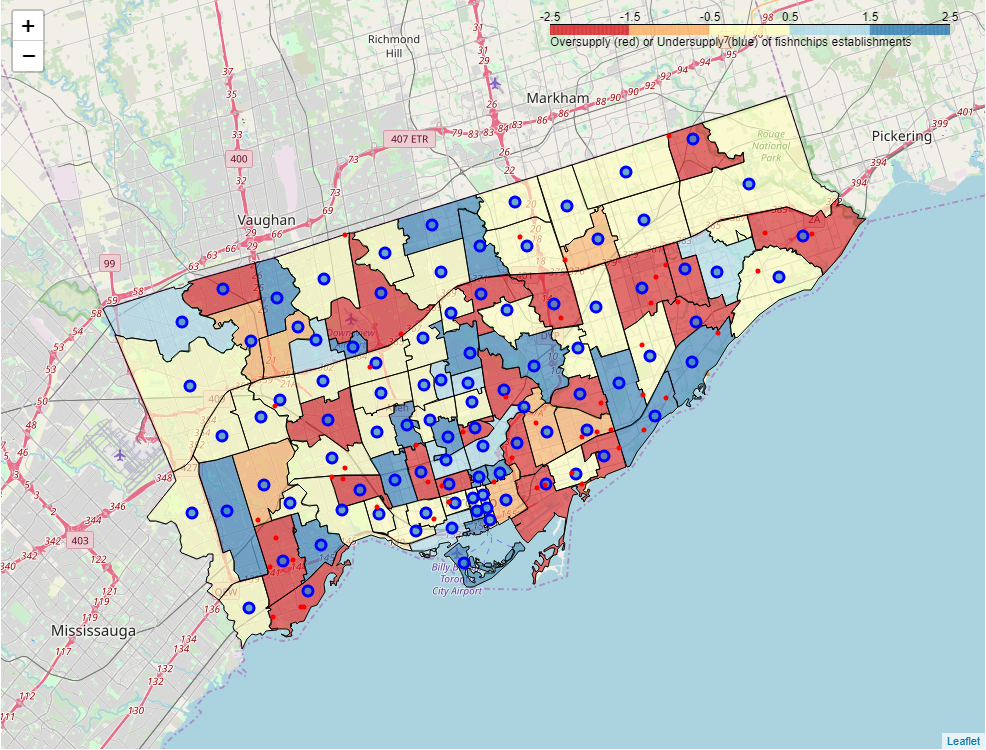

And the map blow displays the results for a sandwich shop.

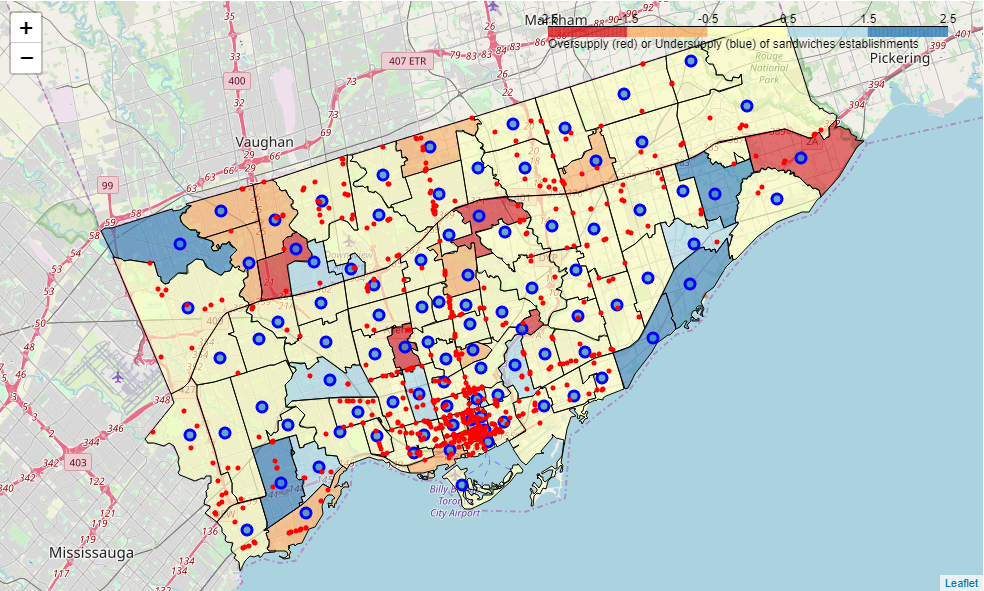

## Conclusions

The predictive and assessment steps described above were executed for a variety of proposed business types, and appeared to provide reasonable and potentially valuable results. This is despite the use of a very limited amount of publicly-available data to drive the modelling.

In refining this project into an application with real-world use, one would need to address several limitations:
* more comprehensive sources of business information should be researched, and potentially data from several sources could be combined.
* the clustering of neighbourhood types would also benfit from additional information regarding the demographics, land use, housing types and values, etc of each neighbourhood.
* while postal code Forward Sorting Areas seemed to provide a reasonable geographic breakdown for the GTA, a real world model should probably use a finer and more handcrafted breakdown. This would need to be done in tandem with obtaining more comprehensive business information, otherwise the number of business in each 'neighbourhood' would become to small to be predictively useful.
* the Yelp categorisation model benefitted from even the rough adjustments that were done for this assignment. In a real-world application, much more refinement of the business categorisation model would be required. It is likely that categorisation taxonomies from several sources would need to be aligned into a common taxonomy. This would be a labourious effort.

No doubt similar, but much more sophisticated, models are in fact used in determining good locations for new businesses. One of the interesting observations arising from this exercise is how the availability of publicly-accessible datasets and the software used to manipulate them has placed this type of analysis within the reach of anyone with a computer and an internet connection.

## References

1. GDAL - Geospatial Data Abstraction Library. (2019 March). Retrieved from https://www.gdal.org/ogr2ogr.html.

2. Government of Canada. (2019, January). Key Small Business Statistics. Retrieved from https://www.ic.gc.ca/eic/site/061.nsf/eng/h_03090.html.

3. Statistics Canada. (2019, April 21). Forward Sortation Area Boundary File. Retrieved from https://www150.statcan.gc.ca/n1/en/catalogue/92-179-X.

4. Wikipedia. List of postal codes of Canada: M. Retrieved from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, April 2019.

5. Yelp. /businesses/search API documentation. Retrieved from https://www.yelp.com/developers/documentation/v3/business_search,April 2019.